In [1]:
# Q1
import pandas as pd

# read csv
df = pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%207/pizza/orders.csv")

df


,id,customerId,storeId,orderDate,nItems,total
0,0,C501741,S302800,2021-04-11T00:05:37Z,1,22.99
1,1,C896243,S750231,2022-06-11T02:12:49Z,2,27.98
2,2,C720657,S799887,2022-06-13T20:18:55Z,1,12.99
3,3,C647388,S688745,2022-11-12T07:06:27Z,1,15.99
4,4,C521597,S688745,2020-05-21T02:41:23Z,1,15.99
...,...,...,...,...,...,...
1048570,1048570,C663752,S064089,2020-04-04T00:17:21Z,2,35.98
1048571,1048571,C479324,S062214,2021-03-05T01:24:34Z,1,22.99
1048572,1048572,C476032,S476770,2020-02-01T23:49:55Z,1,23.99
1048573,1048573,C604677,S688745,2020-01-27T03:58:41Z,1,22.99


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1048575 non-null  int64  
 1   customerId  1048575 non-null  object 
 2   storeId     1048575 non-null  object 
 3   orderDate   1048575 non-null  object 
 4   nItems      1048575 non-null  int64  
 5   total       1048575 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 48.0+ MB


In [3]:
# Q1-1
'''
Which store ID had the greatest revenue on March 5, 2021?
'''

# convert the orderDate column to datetime
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')

# filter the DataFrame to include only rows with a specific date
specific_date = pd.to_datetime('2021-03-05').date()
df['orderDate2'] = df['orderDate'].apply(lambda x: x.date() )
filtered_df = df.loc[df['orderDate2'] == specific_date]

# group the filtered dataframe by store ID and sum the total column to calculate the revenue for each store
revenue_by_store = filtered_df.groupby('storeId')['total'].sum()

# get the store ID with the greatest revenue
store_with_greatest_revenue = revenue_by_store.idxmax()

# print the store ID with the greatest revenue
print(f"The store ID with the greatest revenue on March 5, 2021 was {store_with_greatest_revenue}.")


The store ID with the greatest revenue on March 5, 2021 was S302800.


In [4]:
# Q1-2
'''
On what date did customer ID C000015 spend the most?
'''
# filter the data by customer ID
customer_df = df[df['customerId'] == 'C000015']

# group the data by order date and sum the total spending
customer_spending=customer_df.groupby('orderDate2')['total'].sum()

# find the date when the customer spent the most
date_spent_the_most=customer_spending.idxmax()

# format the output date
formatted_date = pd.to_datetime(date_spent_the_most).strftime("%B %d, %Y")

# filter the data for the maximum spending date and customer ID
max_spending_data = customer_df[customer_df['orderDate2'] == date_spent_the_most]

# sum up the total spending for that date
max_spending = max_spending_data['total'].sum()

# print the date  customer ID C000015 spend the most and the amount
print(f"The date when customer ID C000015 spent the most was: {formatted_date}" )
print(f"The spending for that date was: {max_spending}")

The date when customer ID C000015 spent the most was: December 24, 2022
The spending for that date was: 49.98


In [5]:
# Q1-3
'''
How many orders have been placed between 1 and 5 AM?
'''
# generate a range of dates and times between 1 and 5 AM
start_date = pd.Timestamp('2021-01-01 01:00:00')
end_date = pd.Timestamp('2023-01-01 05:00:00')
date_range = pd.date_range(start_date, end_date, freq='H')

# filter the data for orders placed between 1 and 5 AM
filtered_df = df[df['orderDate'].isin(date_range)]

# count the number of orders
num_orders = len(filtered_df)

print(f"The number of orders placed between 1 and 5 AM is: {num_orders}")

The number of orders placed between 1 and 5 AM is: 47


In [6]:
# Q2 
# read csv
df2 =pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%207/pizza/stores.csv")

df2

,id,zipcode,state_abbr,latitude,longitude,city,state,distance
0,S490972,89834,NV,41.328852,-116.12251,Tuscarora,Nevada,14.849417
1,S476770,94586,CA,37.593883,-121.88281,Sunol,California,4.629507
2,S750231,95627,CA,38.744062,-121.99929,Esparto,California,3.775240
3,S688745,85328,AZ,33.326956,-114.68562,Cibola,Arizona,15.846480
4,S817950,95219,CA,38.004922,-121.40022,Stockton,California,12.304320
5,S948821,95912,CA,38.971590,-122.02725,Arbuckle,California,3.748167
6,S872983,95140,CA,37.388718,-121.63845,Mount Hamilton,California,16.226368
7,S799887,89825,NV,41.890872,-114.44545,Jackpot,Nevada,25.151965
8,S013343,89820,NV,40.489736,-117.08692,Battle Mountain,Nevada,49.788229
9,S068548,93436,CA,34.639682,-120.44710,Lompoc,California,99.959851


In [7]:
# Q2
# Merge the pizza order dataset with the pizza stores dataset
merged_df = pd.merge(df, df2, left_on='storeId', right_on='id')

# Print the first 10 rows of the merged dataset
merged_df.head(10)

,id_x,customerId,storeId,orderDate,nItems,total,orderDate2,id_y,zipcode,state_abbr,latitude,longitude,city,state,distance
0,0,C501741,S302800,2021-04-11 00:05:37+00:00,1,22.99,2021-04-11,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
1,14,C863719,S302800,2020-12-05 01:57:24+00:00,1,11.99,2020-12-05,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
2,18,C044363,S302800,2021-05-31 02:51:22+00:00,3,60.97,2021-05-31,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
3,27,C088095,S302800,2021-06-06 19:37:53+00:00,1,11.99,2021-06-06,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
4,31,C284377,S302800,2021-11-23 01:55:48+00:00,1,21.99,2021-11-23,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
5,32,C140073,S302800,2021-02-05 23:38:36+00:00,1,11.99,2021-02-05,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
6,38,C612070,S302800,2021-11-02 02:05:42+00:00,2,38.98,2021-11-02,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
7,57,C744394,S302800,2022-07-09 23:43:14+00:00,1,12.99,2022-07-09,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
8,59,C650176,S302800,2021-04-16 21:32:34+00:00,2,40.98,2021-04-16,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
9,61,C203918,S302800,2022-03-16 01:59:44+00:00,1,12.99,2022-03-16,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746


In [8]:
# Q2-1
'''
During what month did stores in the state of Nevada collect the most revenue?
'''
# filter the dataset to only include stores in Nevada
nv_stores = merged_df[merged_df['state_abbr'] == 'NV'].copy()

# convert the orderDate column to a pandas datetime object
nv_stores.loc[:, 'orderDate2'] = pd.to_datetime(nv_stores['orderDate2'])

# calculate the total revenue collected by each store for each month
monthly_revenue = nv_stores.groupby([nv_stores['storeId'], pd.Grouper(key='orderDate2', freq='M')])['total'].sum().reset_index()

# calculate the total revenue collected by all stores in Nevada for each month
total_monthly_revenue = monthly_revenue.groupby(pd.Grouper(key='orderDate2', freq='M'))['total'].sum().reset_index()

# sort the monthly revenue by total revenue collected in descending order
total_monthly_revenue = total_monthly_revenue.sort_values('total', ascending=False)

# print the month with the highest total revenue
print(f"The month with the highest total revenue for stores in Nevada was: {total_monthly_revenue.iloc[0]['orderDate2'].strftime('%B %Y')}")

The month with the highest total revenue for stores in Nevada was: January 2022


In [9]:
# Q2-2
'''
Which city in California sold the largest number of items in January, 2021?
'''
# filter the dataset to only include stores in California
ca_stores = merged_df[merged_df['state_abbr'] == 'CA']

# filter the dataset to only include orders in January 2021 using apply
ca_stores_jan = ca_stores[ca_stores['orderDate2'].apply(lambda x: x.month == 1 and x.year == 2021)]

# calculate the total number of items sold by each city
city_items_sold = ca_stores_jan.groupby('city')['nItems'].sum().reset_index()

# find the city with the largest number of items sold
largest_city = city_items_sold.loc[city_items_sold['nItems'].idxmax(), 'city']

# print the result
print(f"The city in California that sold the largest number of items in January, 2021 was: {largest_city}")

The city in California that sold the largest number of items in January, 2021 was: Sunol


In [10]:
# Q2-3
'''
In what city are average item values (e.g., revenue divided by number of items sold) the lowest?
'''
# calculate the average item value for each city
city_avg_value = merged_df.groupby('city').apply(lambda x: x['total'].sum() / x['nItems'].sum()).reset_index(name='avg_value')

# find the city with the lowest average item value
lowest_value_city = city_avg_value.loc[city_avg_value['avg_value'].idxmin(), 'city']

# print the result
print(f"The city with the lowest average item value is: {lowest_value_city}")


The city with the lowest average item value is: Ibapah


In [66]:
# Q3
'''
Create a subset of the data just for store ID S302800
'''
store_subset = merged_df[merged_df['storeId'] == 'S302800'].copy()
store_subset

,id_x,customerId,storeId,orderDate,nItems,total,orderDate2,id_y,zipcode,state_abbr,latitude,longitude,city,state,distance
0,0,C501741,S302800,2021-04-11 00:05:37+00:00,1,22.99,2021-04-11,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
1,14,C863719,S302800,2020-12-05 01:57:24+00:00,1,11.99,2020-12-05,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
2,18,C044363,S302800,2021-05-31 02:51:22+00:00,3,60.97,2021-05-31,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
3,27,C088095,S302800,2021-06-06 19:37:53+00:00,1,11.99,2021-06-06,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
4,31,C284377,S302800,2021-11-23 01:55:48+00:00,1,21.99,2021-11-23,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98105,1048533,C256465,S302800,2022-07-02 01:06:41+00:00,1,14.99,2022-07-02,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
98106,1048538,C995867,S302800,2022-07-03 02:44:07+00:00,2,41.98,2022-07-03,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
98107,1048550,C559682,S302800,2021-03-17 03:18:10+00:00,2,28.98,2021-03-17,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746
98108,1048562,C228965,S302800,2022-02-08 23:46:21+00:00,1,22.99,2022-02-08,S302800,84034,UT,40.105506,-113.94372,Ibapah,Utah,37.338746


In [67]:
# Q3-1
'''
Resample the data so it contains daily totals
'''
# convert the orderDate2 column to a pandas datetime object with timezone information
store_subset['orderDate2'] = pd.to_datetime(store_subset['orderDate2'], utc=True)

# set the index to orderDate2 column
store_subset.set_index('orderDate2', inplace=True)

# resample the data by day and sum the total revenue for each day
daily_totals = store_subset.resample('D').sum()

# drop the columns that won't be used
daily_totals.drop('id_x', axis=1, inplace=True)
daily_totals.drop('nItems', axis=1, inplace=True)
daily_totals.drop('zipcode', axis=1, inplace=True)
daily_totals.drop('latitude', axis=1, inplace=True)
daily_totals.drop('longitude', axis=1, inplace=True)
daily_totals.drop('distance', axis=1, inplace=True)

# show only the year, month, and day for the index
daily_totals.index = daily_totals.index.strftime('%Y-%m-%d')
daily_totals.index=pd.to_datetime(daily_totals.index)

daily_totals


,total
orderDate2,
2020-01-01,110.93
2020-01-02,912.50
2020-01-03,1039.42
2020-01-04,1850.95
2020-01-05,1180.37
...,...
2022-12-27,3118.14
2022-12-28,2629.41
2022-12-29,3022.19


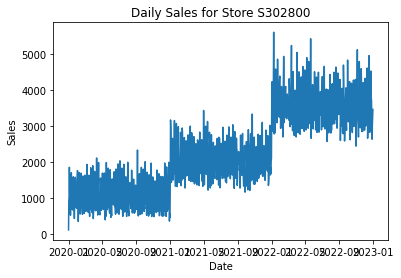

In [68]:
# Q3-2
'''
Plot the line chart of daily sales for the store
'''

import matplotlib.pyplot as plt

# plot the daily sales
plt.plot(daily_totals['total'])

# set the x-axis label and the title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales for Store S302800')

# display the plot
plt.show()

In [69]:
# Q3-3
'''
Challenge (not required for full credit): forecast daily sales for the year 2023 for this store
'''
# Split the data into training and testing sets
import math
train_portion=0.8
train_rows=math.floor(len(daily_totals)*train_portion)
train=daily_totals[:train_rows]
test=daily_totals[train_rows:]


In [15]:
# Q3-3
print(len(train),len(test))

876 220


In [71]:
# Q3-3
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00


In [72]:
# Q3-3
import pmdarima as pm
# using auto_arima function to find out best values for p, d, q
auto_arima = pm.auto_arima(train, stepwise=True, seasonal=False)
auto_arima

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


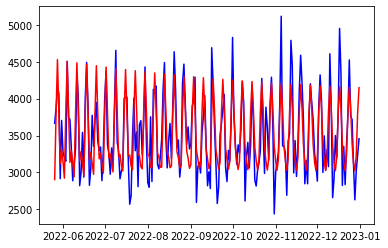

In [73]:
# Q3-3
from pandas.io.parsers.python_parser import parser_defaults
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
# fit an ARIMA model
model = ARIMA(train, order=(4, 1, 5))
model = model.fit()


# generate forecasts for test set
preds = model.get_forecast(len(test))
predictions = model.predict(start=test.index[0],end=test.index[-1])

# plot actual vs. predicted values
plt.plot(test,color="blue",label="actuals")
plt.plot(predictions,color="red",label="predicted")



In [74]:
# Q3-3
# forecast sales for 2023
forecast = model.predict(start=pd.to_datetime('2023-01-01'), end=pd.to_datetime('2023-12-31'))

# print the forecast for the year 2023
print(forecast)

2023-01-01    3862.803599
2023-01-02    3398.264511
2023-01-03    3128.933055
2023-01-04    3021.878704
2023-01-05    3238.364190
                 ...     
2023-12-27    3070.074097
2023-12-28    3350.697979
2023-12-29    3767.026234
2023-12-30    3988.050640
2023-12-31    3843.665638
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


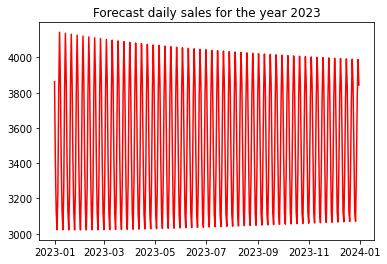

In [78]:
# Q3-3
# plot predicted daily sales for the year 2023
plt.plot(forecast,color="red",label="predicted")
plt.title('Forecast daily sales for the year 2023')
plt.show()

In [22]:
# Project Euler problem #18 ----Maximum path sum I
'''
By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.

3
7 4
2 4 6
8 5 9 3

That is, 3 + 7 + 4 + 9 = 23.

Find the maximum total from top to bottom of the triangle below:

75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23

NOTE: As there are only 16384 routes, it is possible to solve this problem by trying every route. However, Problem 67, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)
'''

triangle = [    [75],
    [95, 64],
    [17, 47, 82],
    [18, 35, 87, 10],
    [20, 4, 82, 47, 65],
    [19, 1, 23, 75, 3, 34],
    [88, 2, 77, 73, 7, 63, 67],
    [99, 65, 4, 28, 6, 16, 70, 92],
    [41, 41, 26, 56, 83, 40, 80, 70, 33],
    [41, 48, 72, 33, 47, 32, 37, 16, 94, 29],
    [53, 71, 44, 65, 25, 43, 91, 52, 97, 51, 14],
    [70, 11, 33, 28, 77, 73, 17, 78, 39, 68, 17, 57],
    [91, 71, 52, 38, 17, 14, 91, 43, 58, 50, 27, 29, 48],
    [63, 66, 4, 68, 89, 53, 67, 30, 73, 16, 69, 87, 40, 31],
    [4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23]
]

# start from the second-last row of the triangle
for i in range(len(triangle) - 2, -1, -1):
    # calculate the maximum total for each number in the current row
    for j in range(len(triangle[i])):
        triangle[i][j] += max(triangle[i+1][j], triangle[i+1][j+1])

# the maximum total possible from top to bottom is the value at the top of the triangle
print(f"the maximum total possible from top to bottom is: {triangle[0][0]}")

the maximum total possible from top to bottom is: 1074
